# Stock Market Prediction Pipeline: A Machine Learning Approach

**Authors:** Team 003 (Itay, Moran, Shaked)  
**Course:** Workshop in Data Science, Tel Aviv University  
**Date:** November 2025

---

## Abstract

This report documents the development of an end-to-end machine learning pipeline for predicting short-term stock movements of Apple Inc. (AAPL). We address the challenge of non-stationarity in financial time series by modeling **Logarithmic Returns** rather than raw prices. Our evaluation framework incorporates statistical metrics (MSE), financial risk metrics (Sharpe Ratio), and trading utility metrics (Directional Accuracy). This document serves as a living research report, integrating theoretical methodology with empirical results.

## Table of Contents

1. [Business Understanding & Problem Formulation](#1.-Business-Understanding-&-Problem-Formulation)
    - [1.1 Project Objective & Goals](#1.1-Project-Objective-&-Goals)
    - [1.2 Target Variable Definition (Log-Returns)](#1.2-Target-Variable-Definition-(Log-Returns))
    - [1.3 Success Criteria & KPIs](#1.3-Success-Criteria-&-KPIs)
2. [Data Access & Exploratory Data Analysis (EDA)](#2.-Data-Access-&-Exploratory-Data-Analysis-(EDA))
    - [2.1 Data Ingestion & Schema](#2.1-Data-Ingestion-&-Schema)
    - [2.2 Statistical Properties & Stationarity Tests](#2.2-Statistical-Properties-&-Stationarity-Tests)
    - [2.3 Feasibility Analysis & Signal Exploration](#2.3-Feasibility-Analysis-&-Signal-Exploration)
3. [Data Preparation & Feature Engineering](#3.-Data-Preparation-&-Feature-Engineering)
    - [3.1 Data Cleaning & Time Alignment](#3.1-Data-Cleaning-&-Time-Alignment)
    - [3.2 Technical Indicators Extraction](#3.2-Technical-Indicators-Extraction)
    - [3.3 Sentiment Analysis & Aggregation](#3.3-Sentiment-Analysis-&-Aggregation)
    - [3.4 Feature Selection Logic](#3.4-Feature-Selection-Logic)
4. [Methodology & Validation Strategy](#4.-Methodology-&-Validation-Strategy)
    - [4.1 Evaluation Metrics Definition](#4.1-Evaluation-Metrics-Definition)
    - [4.2 Validation Scheme: Strict Walk-Forward Split](#4.2-Validation-Scheme:-Strict-Walk-Forward-Split)
5. [Modeling & Training](#5.-Modeling-&-Training)
    - [5.1 Baseline Models (Naive, Random, Market Benchmark)](#5.1-Baseline-Models-(Naive,-Random,-Market-Benchmark))
    - [5.2 Linear Models](#5.2-Linear-Models)
    - [5.3 Advanced Models](#5.3-Advanced-Models)
6. [Advanced Evaluation & Results](#6.-Advanced-Evaluation-&-Results)
    - [6.1 Error Analysis](#6.1-Error-Analysis)
    - [6.2 Trading Strategy Backtesting](#6.2-Trading-Strategy-Backtesting)
    - [6.3 Comparison to Baselines](#6.3-Comparison-to-Baselines)
7. [Explainability & Interpretation](#7.-Explainability-&-Interpretation)
    - [7.1 Global Feature Importance](#7.1-Global-Feature-Importance)
    - [7.2 SHAP Values Analysis](#7.2-SHAP-Values-Analysis)
8. [Conclusion & Future Work](#8.-Conclusion-&-Future-Work)
    - [8.1 Summary of Findings](#8.1-Summary-of-Findings)
    - [8.2 Proposed Improvements](#8.2-Proposed-Improvements)

In [5]:
# --- Setup & Configuration ---
import sys
import platform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Internal Modules (src/)
from src.data.loader import fetch_sample_data
from src.evaluation.analysis import check_stationarity
from src.models.baselines import NaiveBaseline, RandomBaseline
from src.evaluation.metrics import evaluate_regression, print_eval
from src.evaluation.plots import set_style, plot_price_vs_returns
from src.features.preprocessing import LogReturnTransformer

# Apply Academic Plotting Style
# %matplotlib inline
set_style()

print(f"Environment: Python {platform.python_version()}")
print("Pipeline modules loaded successfully.")

Environment: Python 3.12.3
Pipeline modules loaded successfully.


# 1. Business Understanding & Problem Formulation

## 1.1 Project Objective & Goals

**The Task:** Numerical Prediction of Daily Log-Returns
The primary objective of this research is to develop a machine learning pipeline for the **Numerical Prediction (Regression)** of the daily Logarithmic Returns of Apple Inc. (AAPL).
We predict continuous values to capture the magnitude of price movements, which allows for flexible downstream decision-making (e.g., aggregating into Buy/Sell/Hold signals based on dynamic thresholds).

## 1.2 Target Variable Definition (Log-Returns)

**System Architecture:**
The system is modeled as a supervised learning problem:
*   **Input ($X_t$):** A feature vector constructed from a sliding window of the past $T=30$ days. This includes:
    *   **Technical Indicators:** Derived from structured OHLCV data (e.g., RSI, MACD, Bollinger Bands).
    *   **News Sentiment:** Aggregated sentiment scores from unstructured textual data on day $t$.
*   **Output ($Y_{t+1}$):** The Log-Return of the *next* trading day ($t+1$).

$$Y_{t+1} = \ln(P_{t+1}) - \ln(P_t)$$

## 1.3 Success Criteria & KPIs

**Data Strategy:**
Our approach relies on the rigorous aggregation of heterogeneous data sources:
1.  **Structured Data:** Daily OHLCV (Open, High, Low, Close, Volume) data from financial APIs.
2.  **Unstructured Data:** Financial news headlines and articles, processed to extract sentiment signals that may precede price movements.


# 2. Data Access & Exploratory Data Analysis (EDA)

## 2.1 Data Ingestion & Schema

*(To be implemented)*
This section will detail the data contracts, caching mechanisms, and ingestion procedures.

## 2.2 Statistical Properties & Stationarity Tests

We first empirically validate the stationarity of our target variable using the Augmented Dickey-Fuller (ADF) test.

Fetching 2y of data for AAPL...


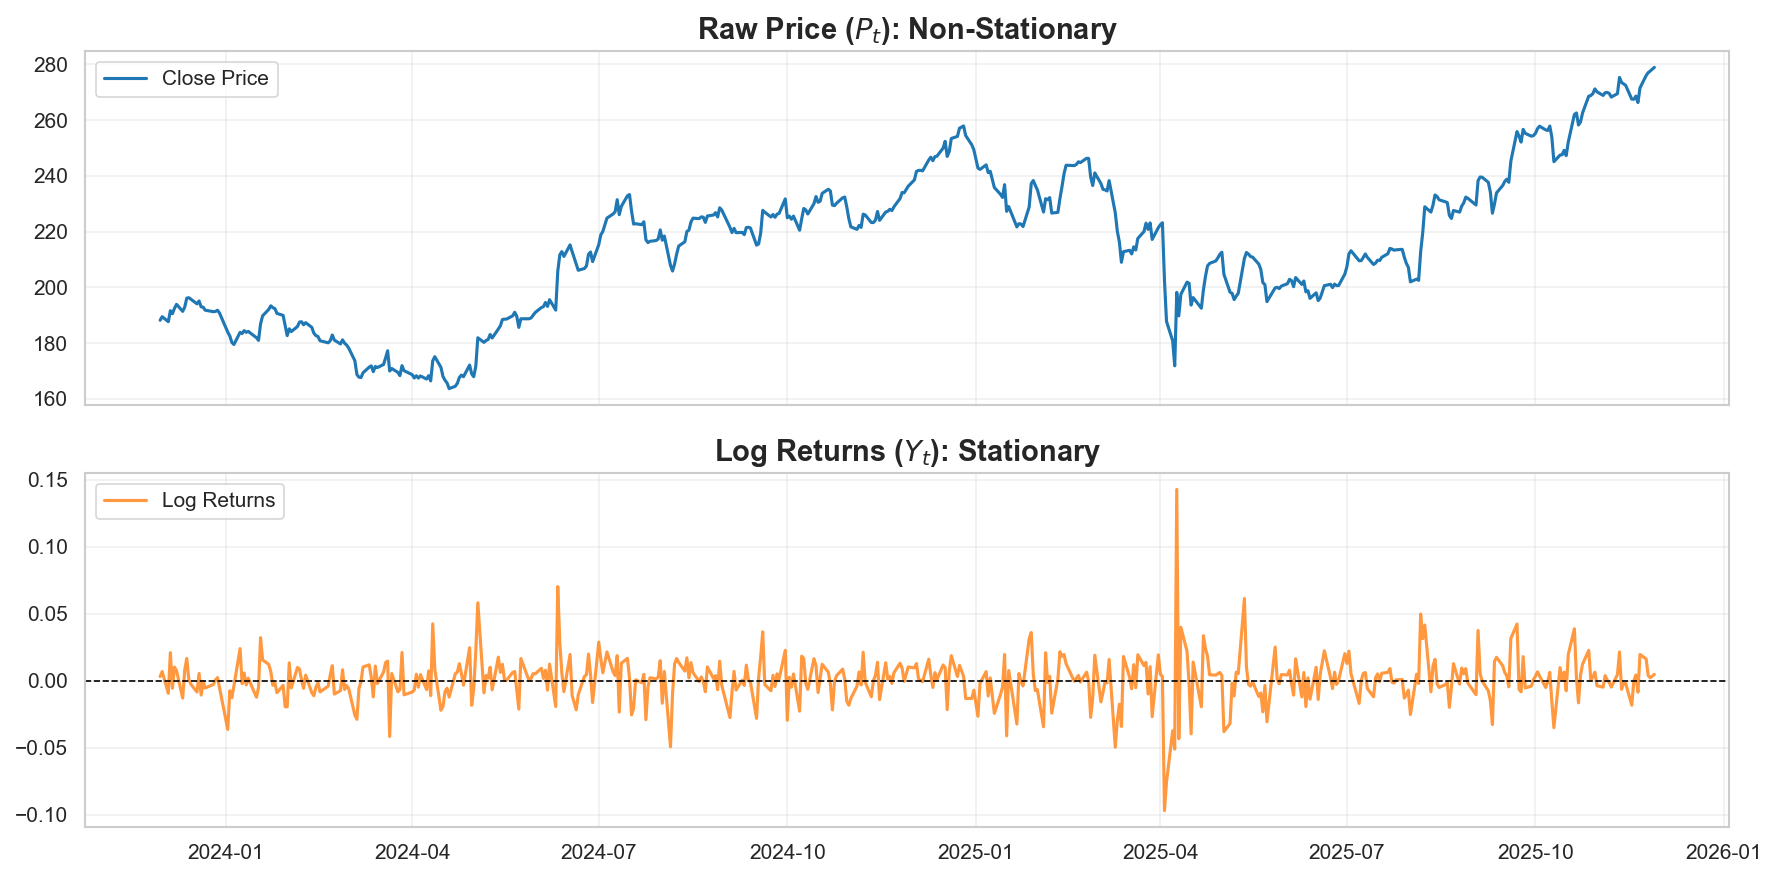


--- Augmented Dickey-Fuller Test: Raw Close Price ---
ADF Statistic: -0.8574
p-value:       0.8017
Result:        Non-Stationary (Fail to reject H0)

--- Augmented Dickey-Fuller Test: Log Returns ---
ADF Statistic: -11.3718
p-value:       0.0000
Result:        Stationary (Reject H0)


In [6]:
# 1. Data Ingestion
df_research = fetch_sample_data("AAPL", period="2y")

# 2. Feature Engineering (Log Returns)
log_transformer = LogReturnTransformer()
df_research = log_transformer.transform(df_research)
df_research.dropna(inplace=True)

# 3. Visualization
plot_price_vs_returns(df_research, 'Log_Returns')

# 4. Hypothesis Testing (ADF)
check_stationarity(df_research['Close'], "Raw Close Price")
check_stationarity(df_research['Log_Returns'], "Log Returns")

## 2.3 Feasibility Analysis & Signal Exploration

*(To be implemented)*

# 3. Data Preparation & Feature Engineering

## 3.1 Data Cleaning & Time Alignment
*(To be implemented)*

## 3.2 Technical Indicators Extraction
*(To be implemented)*

## 3.3 Sentiment Analysis & Aggregation
*(To be implemented)*

## 3.4 Feature Selection Logic
*(To be implemented)*

# 4. Methodology & Validation Strategy

## 4.1 Evaluation Metrics Definition
We employ a multi-faceted evaluation framework to assess model performance from statistical, financial, and trading perspectives.

| Metric | Formula | Rationale |
| :--- | :--- | :--- |
| **MSE** | $\frac{1}{N} \sum (y - \hat{y})^2$ | Penalizes large errors; standard loss function for regression. |
| **Sharpe Ratio** | $\frac{E[R_p] - R_f}{\sigma_p} \sqrt{252}$ | Measures risk-adjusted return. Crucial for validating financial viability. |
| **Directional Accuracy** | $\frac{1}{N} \sum \mathbb{1}_{sign(y) == sign(\hat{y})}$ | Assesses the model's ability to predict market direction (Up/Down). |

## 4.2 Validation Scheme: Strict Walk-Forward Split
To prevent **Look-Ahead Bias**, we strictly adhere to a **Walk-Forward Validation** scheme (Expanding Window). Random shuffling (k-fold CV) is strictly prohibited as it destroys the temporal structure of the data.


In [7]:
# Visualization of Walk-Forward Validation (Expanding Window)
from src.evaluation.plots import plot_walk_forward_validation

plot_walk_forward_validation()

ImportError: cannot import name 'plot_walk_forward_validation' from 'src.evaluation.plots' (/Users/shakedschnarch/Documents/מסמכים מקומי/לימודים/תואר ראשון/מדמ״ח/שנה ג׳/סמסטר 5/Workshop in DS/repo/data-science-project/src/evaluation/plots.py)

# 5. Modeling & Training

## 5.1 Baseline Models (Naive, Random, Market Benchmark)

We establish robust baselines to benchmark our future models. If our complex models cannot outperform these simple heuristics, they provide no value (Alpha).

1.  **Naive Baseline:** Predicts zero return (Martingale).
2.  **Random Baseline (Monte Carlo):** Predicts random returns drawn from the training distribution (Mean/Std). We run 100 simulations to get a stable average.
3.  **Market Benchmark (Buy & Hold):** A passive strategy that always holds the asset. For regression (MSE), this predicts the historical mean. For trading (Sharpe), it captures the asset's inherent risk-premium.


In [ ]:
# --- Empirical Analysis: Robust Baselines ---
from src.evaluation.analysis import run_baseline_analysis
from src.data.loader import fetch_sample_data
from src.features.preprocessing import LogReturnTransformer
import pandas as pd

# 1. Load Data (Train/Test Split for Analysis)
# Note: In a real run, this would use the Walk-Forward splitter. 
# Here we demonstrate on a single temporal split for baseline comparison.
df_prices = fetch_sample_data(ticker='AAPL', period='2y')
transformer = LogReturnTransformer()
df_transformed = transformer.fit_transform(df_prices)
y = df_transformed['Log_Returns']
X = pd.DataFrame(index=y.index) # Dummy features for baselines

# Temporal Split (80/20)
split_idx = int(len(y) * 0.8)
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]

# Run Baseline Analysis
run_baseline_analysis(y_train, y_test, X_test)

## 5.2 Linear Models
*(To be implemented)*

## 5.3 Advanced Models
*(To be implemented)*

# 6. Advanced Evaluation & Results

## 6.1 Error Analysis
*(To be implemented)*

## 6.2 Trading Strategy Backtesting
*(To be implemented)*

## 6.3 Comparison to Baselines
*(To be implemented)*

# 7. Explainability & Interpretation

## 7.1 Global Feature Importance
*(To be implemented)*

## 7.2 SHAP Values Analysis
*(To be implemented)*

# 8. Conclusion & Future Work

## 8.1 Summary of Findings
*(To be implemented)*

## 8.2 Proposed Improvements
*(To be implemented)*